In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
# Open file
efficiency_fva = pd.read_csv('offensive_efficiency_scores_with_past_seasons.csv')

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP


In [16]:
# Change wins and losses to numerical value
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [17]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [18]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,74.488038,52.837321,26.779904,8.421053,15.488038,10.186603,0.599043,45.205551,52.274827
std,12.080702,8.744358,5.728587,4.045978,4.903992,4.125275,0.074451,11.793297,14.079323
min,47.000000,35.000000,14.000000,0.000000,4.000000,1.000000,0.403226,20.210526,23.090526
25%,66.000000,46.000000,22.000000,5.000000,12.000000,7.000000,0.546875,36.298507,42.535484
50%,74.000000,53.000000,27.000000,8.000000,15.000000,10.000000,0.594595,44.054795,52.073239
75%,83.000000,59.000000,31.000000,11.000000,18.000000,13.000000,0.652174,52.027027,60.710886
max,108.000000,77.000000,43.000000,22.000000,30.000000,21.000000,0.800000,82.329545,97.823182


In [19]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,59.228188,49.791946,21.161074,6.751678,11.906040,13.161074,0.483442,29.245880,33.759235
std,11.094265,7.524981,4.864470,3.659320,4.507265,5.911586,0.083793,9.332606,10.998365
min,20.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.219512,4.390244,4.390244
25%,52.000000,44.000000,18.000000,4.000000,9.000000,9.000000,0.417722,21.560000,24.753846
50%,59.000000,50.000000,21.000000,6.000000,12.000000,13.000000,0.485714,28.553846,33.244444
75%,66.000000,54.000000,24.000000,9.000000,14.000000,16.000000,0.536232,35.555556,41.563077
max,83.000000,72.000000,35.000000,21.000000,28.000000,35.000000,0.693878,54.296703,68.561319


In [20]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.546859,0.871304,0.242303,0.555408,-0.219401,0.763307,0.943949,0.921832,-0.542490,0.542490
FieldGoalAttempts,0.546859,1.000000,0.677272,0.587886,0.385723,-0.100142,0.293063,0.465917,0.467386,-0.179308,0.179308
FieldGoalsMade,0.871304,0.677272,1.000000,0.306013,0.630478,-0.160149,0.807071,0.899029,0.897285,-0.458313,0.458313
OffensiveRebounds,0.242303,0.587886,0.306013,1.000000,0.217207,0.129846,0.231500,0.258494,0.264673,-0.207518,0.207518
Assists,0.555408,0.385723,0.630478,0.217207,1.000000,0.062401,0.673031,0.651843,0.728075,-0.349731,0.349731
Turnovers,-0.219401,-0.100142,-0.160149,0.129846,0.062401,1.000000,-0.400141,-0.327785,-0.294983,0.284903,-0.284903
OffensiveEfficiency,0.763307,0.293063,0.807071,0.231500,0.673031,-0.400141,1.000000,0.917626,0.925882,-0.588668,0.588668
EfficientPointsScored,0.943949,0.465917,0.899029,0.258494,0.651843,-0.327785,0.917626,1.000000,0.992846,-0.588492,0.588492
RawEOP,0.921832,0.467386,0.897285,0.264673,0.728075,-0.294983,0.925882,0.992846,1.000000,-0.578998,0.578998
Loss,-0.542490,-0.179308,-0.458313,-0.207518,-0.349731,0.284903,-0.588668,-0.588492,-0.578998,1.000000,-1.000000


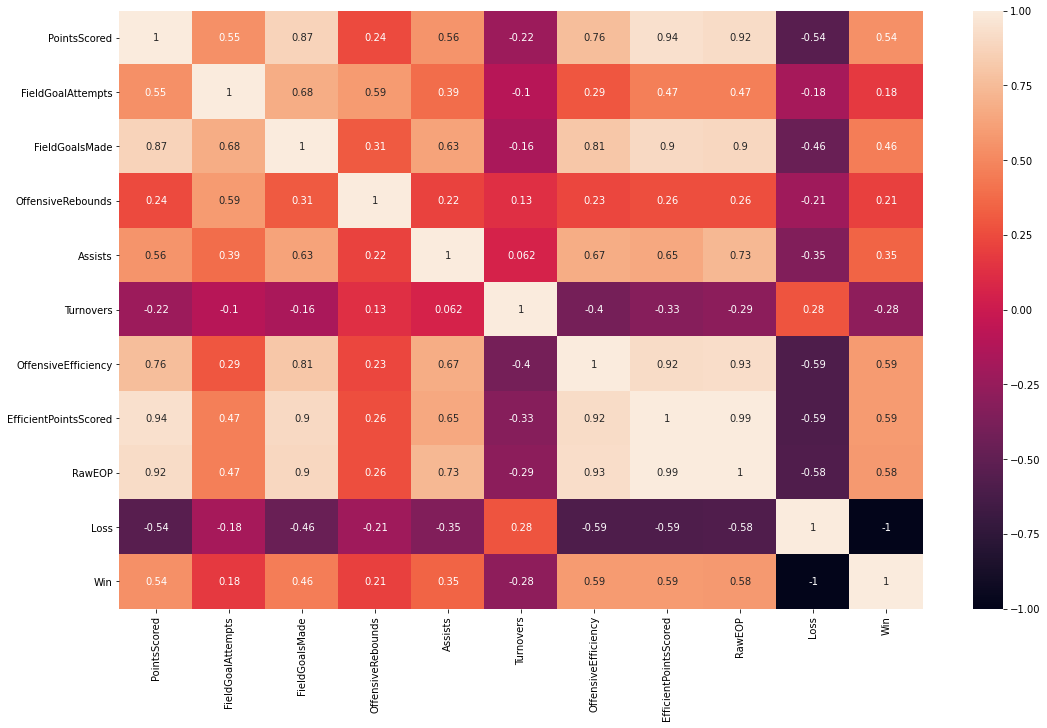

In [21]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

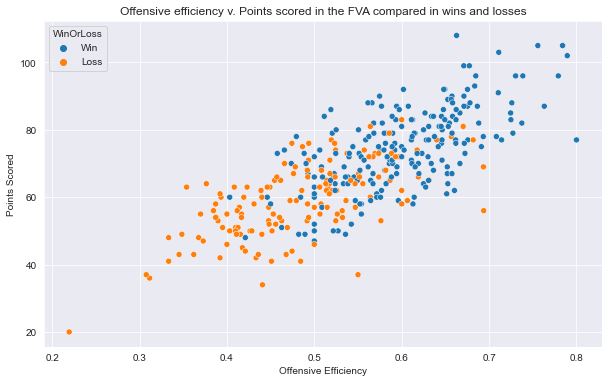

In [23]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");

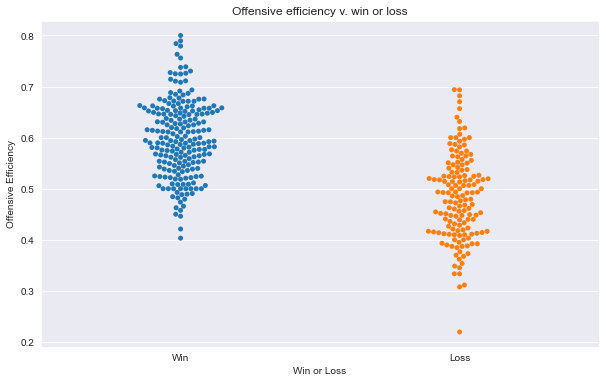

In [24]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

In [25]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [26]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [27]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [28]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [30]:
# Features for machine learning model
base_features = ['FieldGoalAttempts', 'FieldGoalsMade', 'OffensiveRebounds', 'Assists', 'Turnovers', 'OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP', 'PointsScored']
X = efficiency_fva_num[base_features]
X

,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,PointsScored
0,51,20,10,7,11,0.457627,33.406780,35.841356,73
1,48,25,3,14,10,0.565217,40.695652,46.709565,72
2,56,27,6,14,15,0.518987,44.632911,50.154937,86
3,55,25,12,14,21,0.500000,36.000000,41.320000,72
4,54,21,6,13,7,0.500000,30.500000,35.440000,61
...,...,...,...,...,...,...,...,...,...
353,35,21,1,11,6,0.627451,39.529412,44.774902,63
354,39,20,2,18,11,0.575758,34.545455,42.421818,60
355,59,29,12,16,8,0.633803,44.366197,52.073239,70
356,43,19,4,4,4,0.489362,23.978723,25.466383,49


In [31]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [32]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(286, 9) (72, 9) (286,) (72,)


In [33]:
# Best model
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.77586207 0.80701754 0.77192982 0.85964912 0.75438596]
0.7937689050211737


In [34]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.70689655 0.66666667 0.64912281 0.84210526 0.66666667]
0.7062915910465819


In [35]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.68965517 0.75438596 0.78947368 0.85964912 0.66666667]
0.7519661222020568


In [36]:
# Second best
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.74137931 0.73684211 0.77192982 0.89473684 0.80701754]
0.7903811252268602


In [38]:
svc = SVC(probability = True)
cv = cross_val_score(svc, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.70689655 0.77192982 0.73684211 0.84210526 0.71929825]
0.7554143980641258


In [39]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[18:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [40]:
reg = LinearRegression()
cv = cross_val_score(reg, train_X, train_y, cv = 5)
print(cv)
print(cv.mean())

[0.37904226 0.34816938 0.33995448 0.35915111 0.36907468]
0.3590783844036798


In [41]:
# Feature weights for Logistic Regression model
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3667 ± 0.0544,PointsScored
0.2222 ± 0.0703,FieldGoalAttempts
0.2167 ± 0.0889,FieldGoalsMade
0.1528 ± 0.0465,Turnovers
0.1361 ± 0.1015,Assists
0.1111 ± 0.0824,OffensiveRebounds
0.0917 ± 0.0871,RawEOP
0.0500 ± 0.0222,EfficientPointsScored
0 ± 0.0000,OffensiveEfficiency


In [42]:
# Feature weights for Random Forest model 
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0444 ± 0.0643,RawEOP
0.0278 ± 0.0393,OffensiveEfficiency
0.0056 ± 0.0416,FieldGoalsMade
0.0056 ± 0.0136,Turnovers
-0.0028 ± 0.0272,FieldGoalAttempts
-0.0083 ± 0.0222,PointsScored
-0.0167 ± 0.0208,Assists
-0.0250 ± 0.0539,EfficientPointsScored
-0.0444 ± 0.0324,OffensiveRebounds


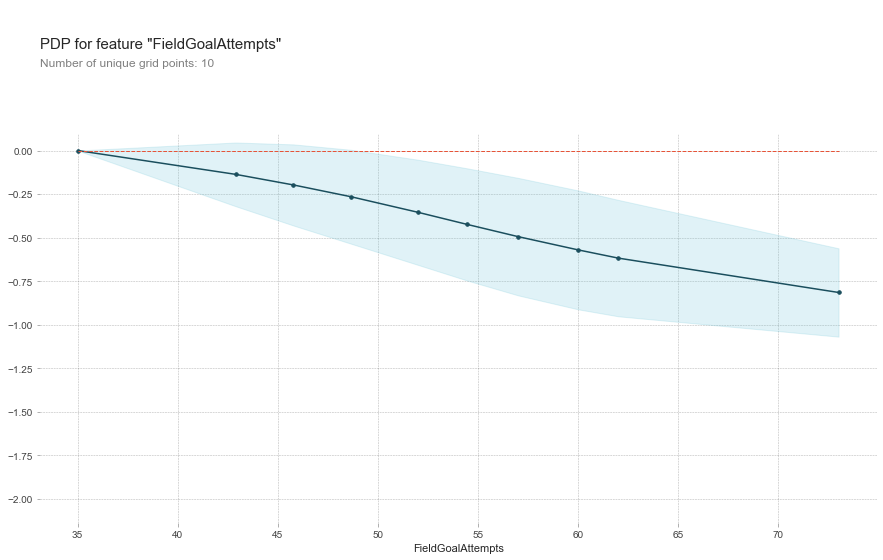

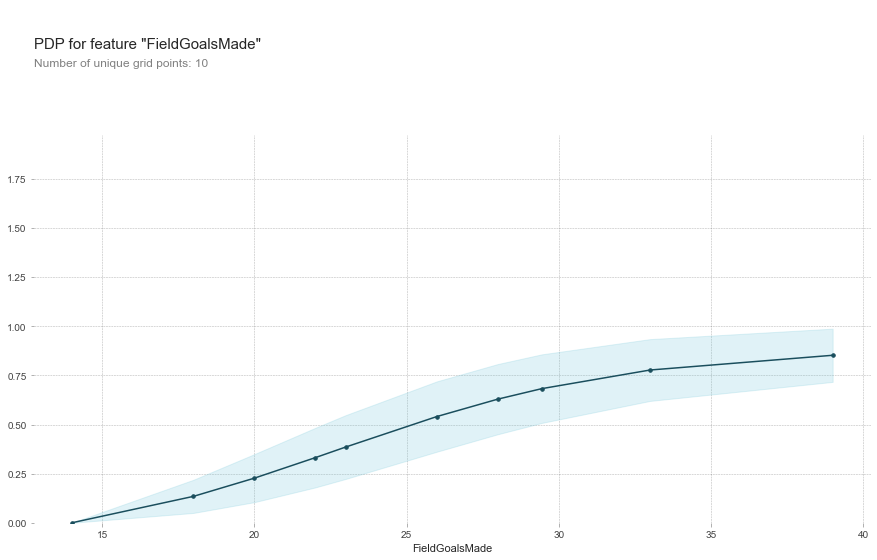

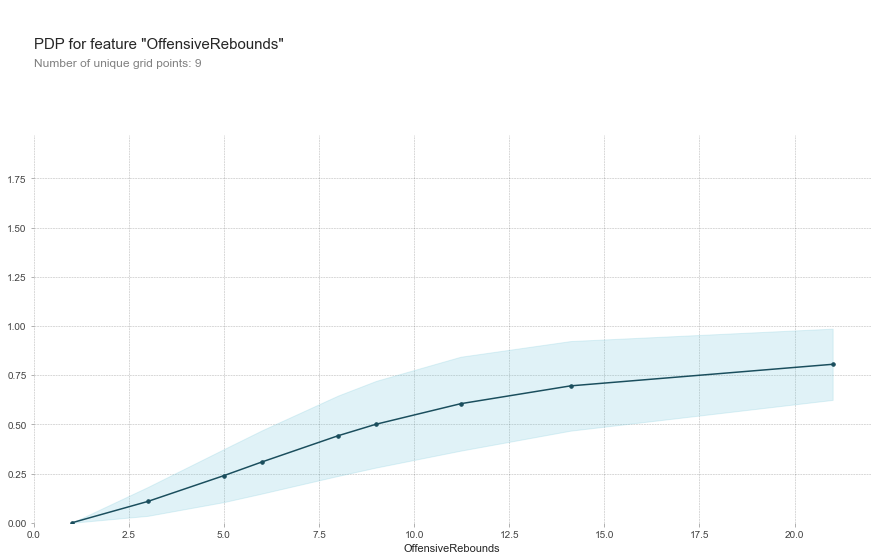

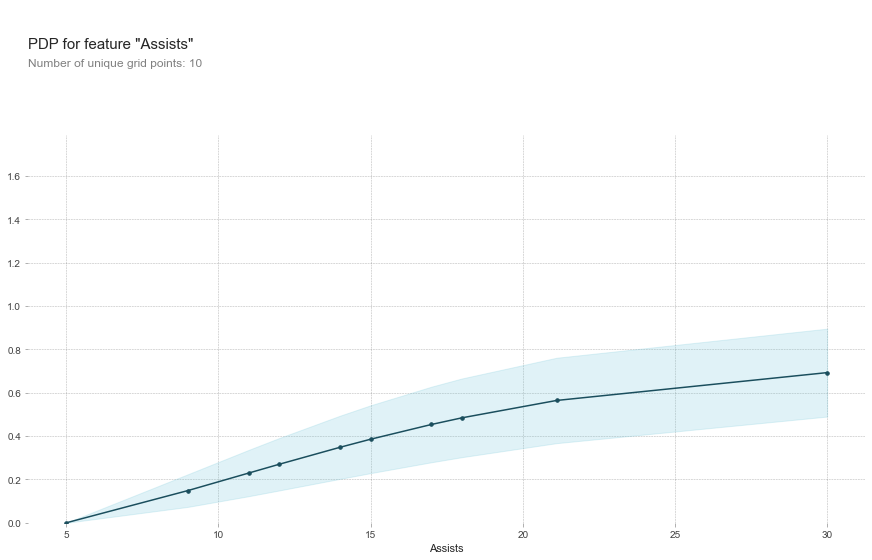

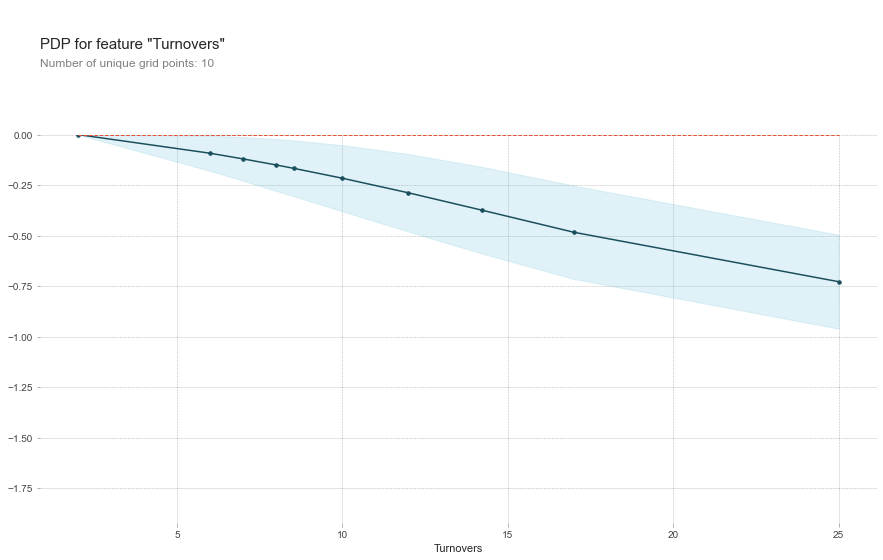

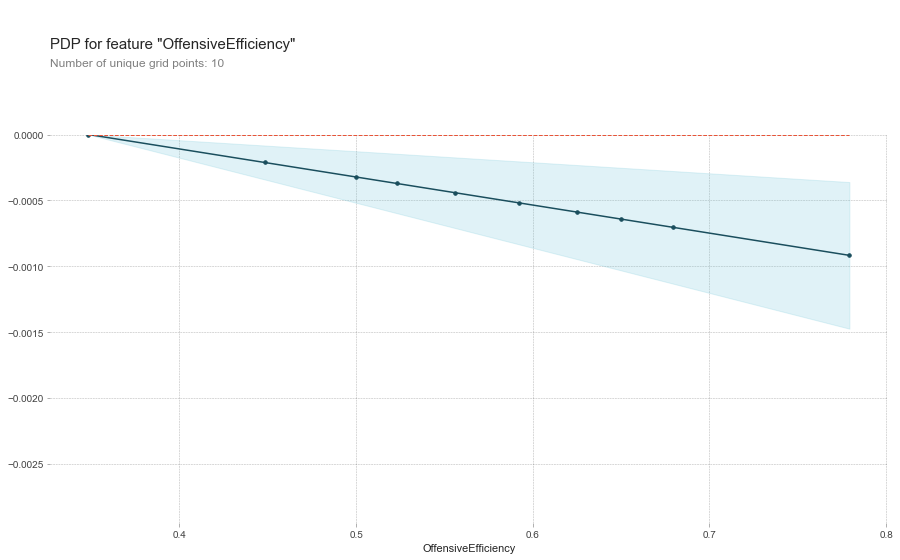

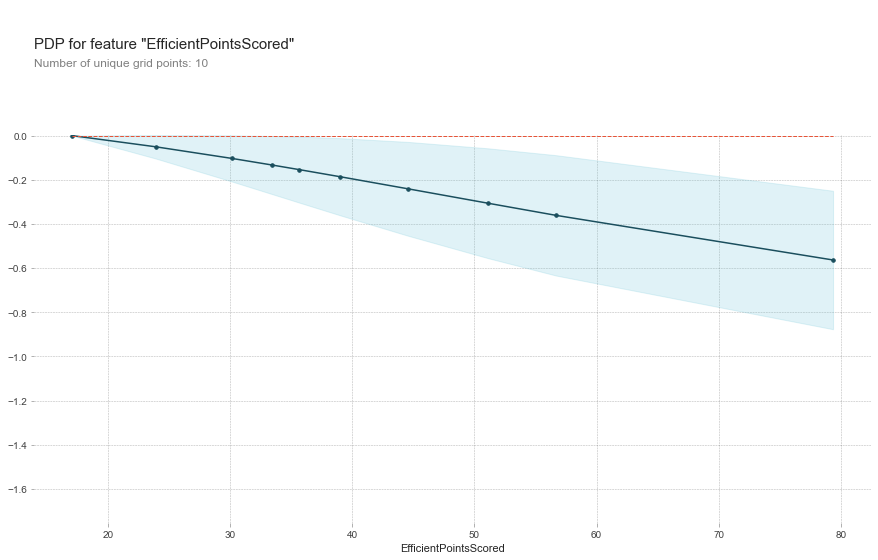

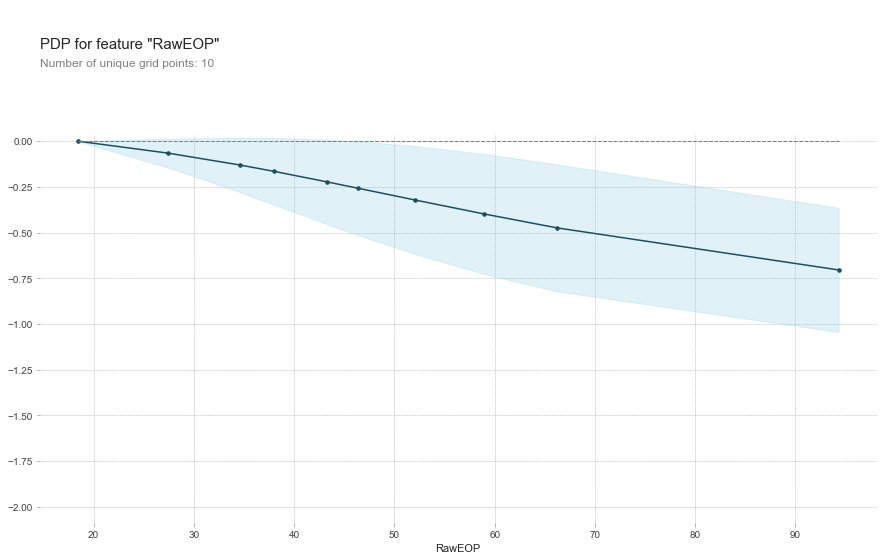

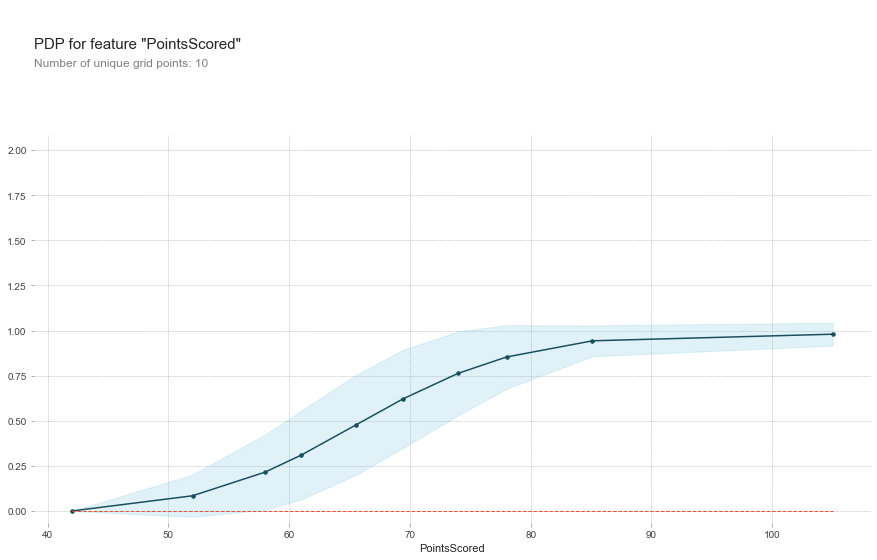

In [46]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

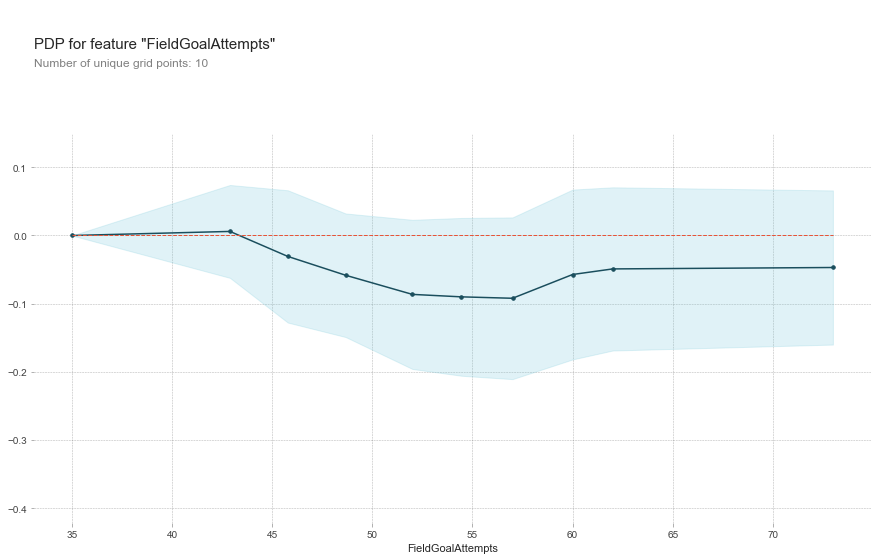

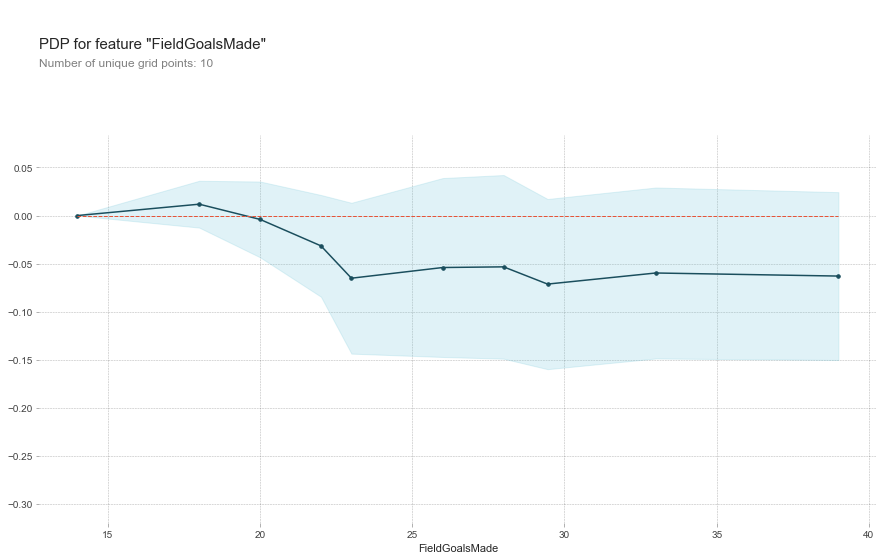

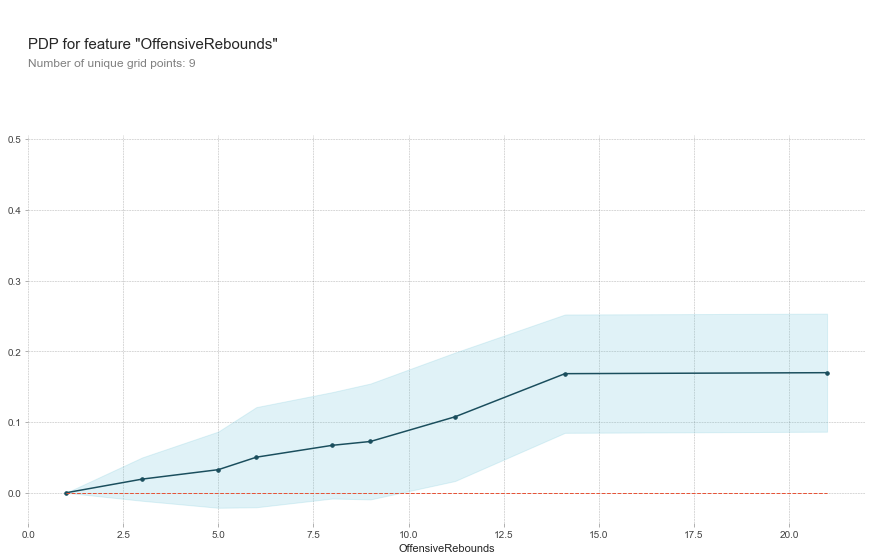

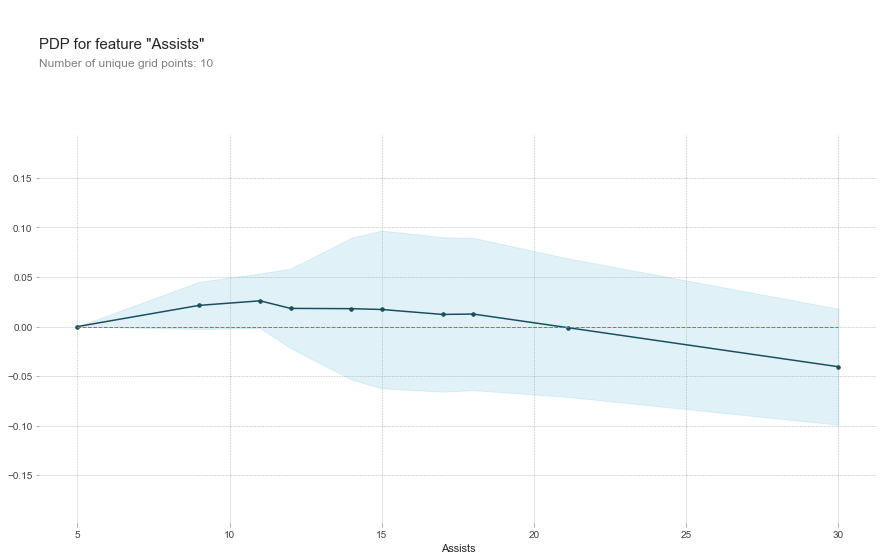

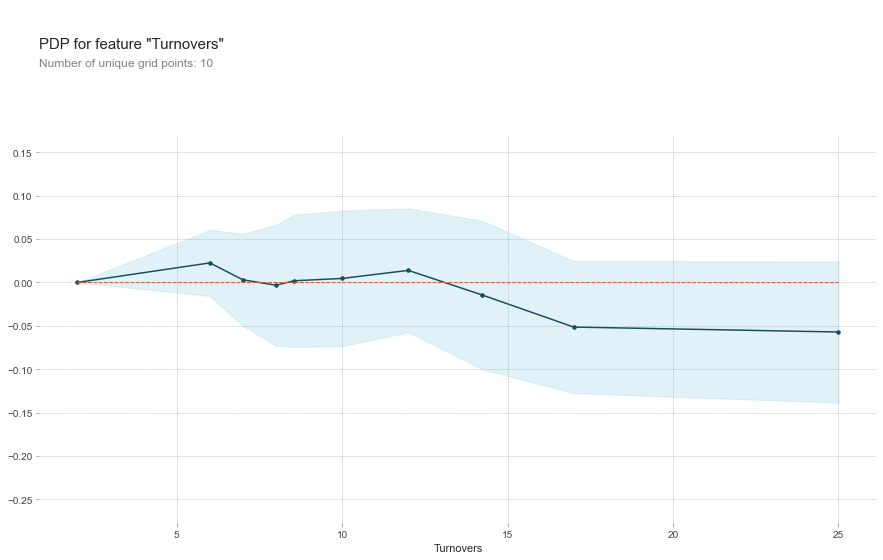

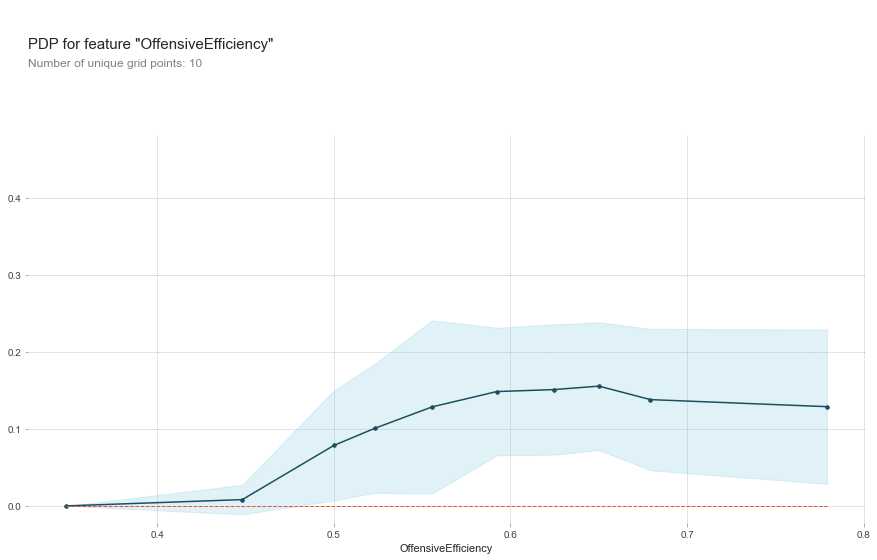

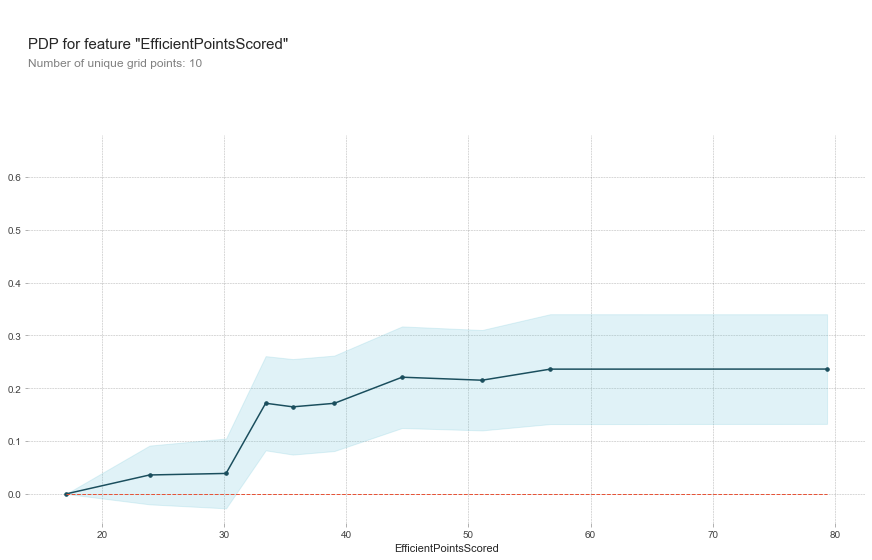

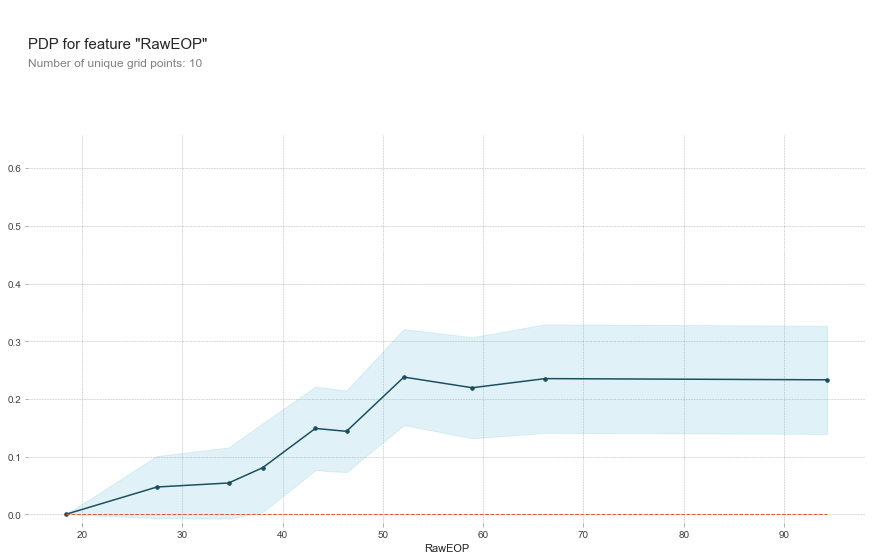

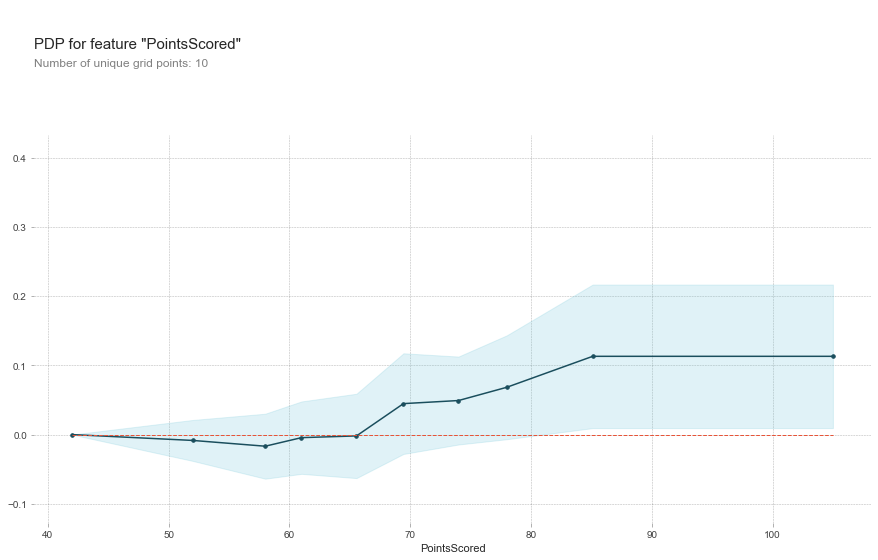

In [47]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = rf, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()